### 화면 가로 확장

In [73]:
# 화면 가로 확장 코드 (기본 width 50%)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

### 모듈 임포트

In [51]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import os

### 3년치 데이터 합본 저장, 확인

In [46]:
df_3Y = pd.DataFrame()
for y in range(2013, 2016):
    file = './Combined_Data/'+str(y)+'_'+'House1_Ch1_Combined_Data_Y.csv'
    df_y= pd.read_csv(file, encoding='cp949')
    df_3Y = pd.concat([df_3Y, df_y])
    
df_3Y = df_3Y.drop([df_3Y.columns[0]], axis=1)
df_3Y = df_3Y.reset_index(drop=True)
df_3Y.to_csv("./Combined_Data/House1_Ch1_Combined_Data_13-15.csv", encoding='cp949')

In [85]:
Data_3Y = pd.read_csv('./Combined_Data/House1_Ch1_Combined_Data_13-15.csv', encoding='cp949')
Data_3Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26280 entries, 0 to 26279
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26280 non-null  int64  
 1   DateTime    26280 non-null  object 
 2   Day         26280 non-null  object 
 3   Holiday     26280 non-null  object 
 4   Seq         26280 non-null  int64  
 5   Watt        26280 non-null  int64  
 6   Temp        26280 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 1.4+ MB


### 각 연도별 csv 데이터 로드

In [62]:
Data_2013=pd.read_csv('./Combined_Data/2013_House1_Ch1_Combined_Data_Y.csv', encoding='cp949')
Data_2014=pd.read_csv('./Combined_Data/2014_House1_Ch1_Combined_Data_Y.csv', encoding='cp949')
Data_2015=pd.read_csv('./Combined_Data/2015_House1_Ch1_Combined_Data_Y.csv', encoding='cp949')
Data_2016=pd.read_csv('./Combined_Data/2016_House1_Ch1_Combined_Data_Y.csv', encoding='cp949')

### 13년도 데이터 그래프 확인

C:\Users\Hwi\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Hwi\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


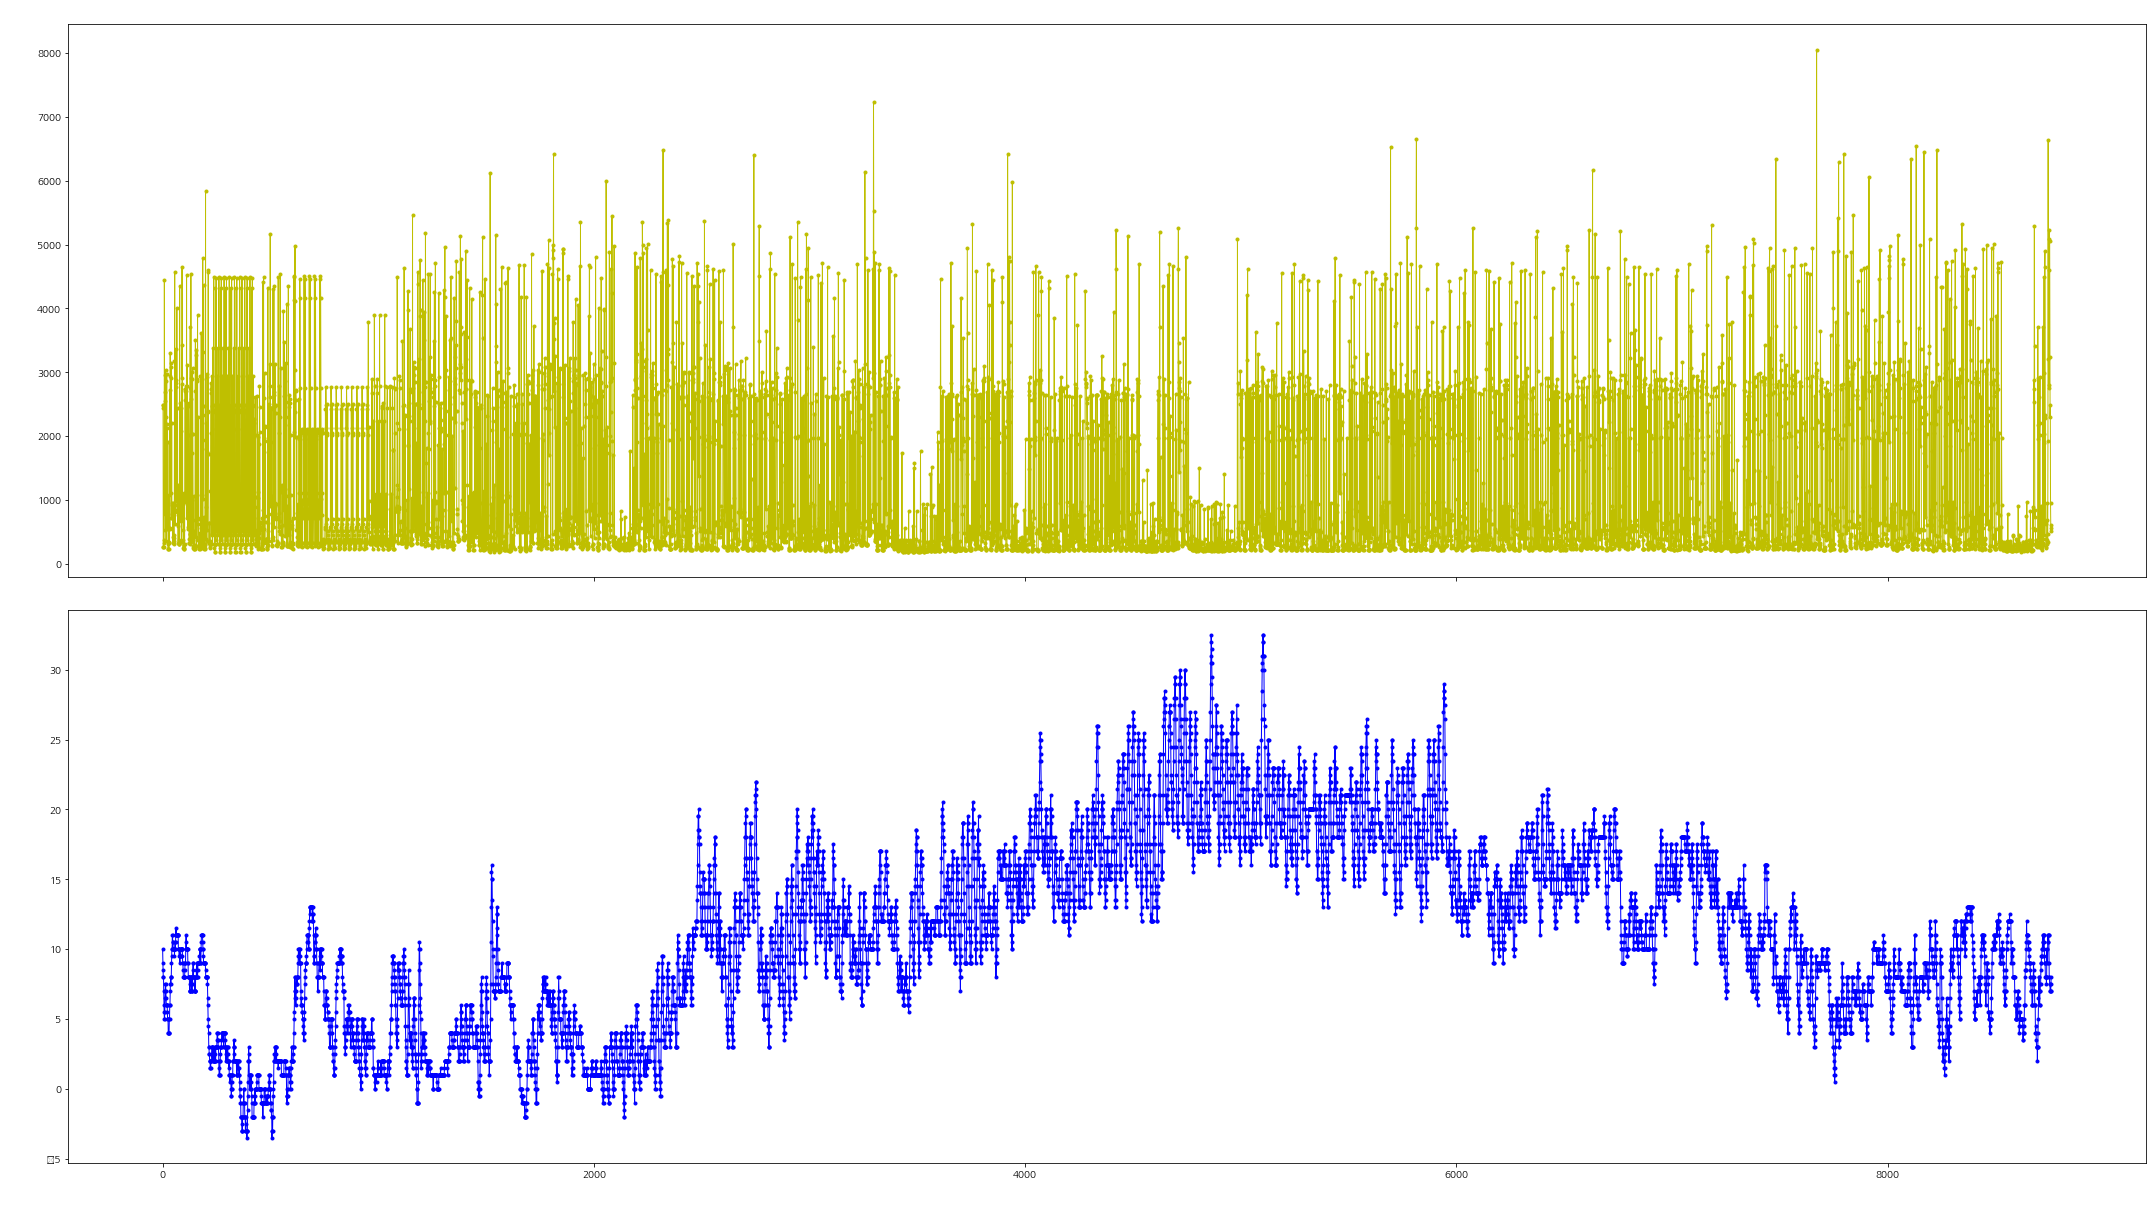

In [78]:
x = Data_2013['Unnamed: 0']

y1 = Data_2013['Watt']
y2 = Data_2013['Temp']
plt.figure(figsize=(30,17))
font1 = {'color': 'w', 'weight': 'bold', 'size': 15}

ax1 = plt.subplot(2, 1, 1)
plt.plot(x, y1, '.-', color='y', linewidth=1)
plt.title("2013's Time-Watt Graph", fontdict=font1)
plt.xticks(visible=False)
plt.ylabel('Watt',labelpad=15, fontdict=font1)

ax2 = plt.subplot(2, 1, 2, sharex=ax1)
plt.plot(x, y2, '.-', color='b', linewidth=1)
plt.title("2013's Time-Temp Graph", fontdict=font1)
plt.xlabel('Time',labelpad=15, fontdict=font1)
plt.ylabel('Temp',labelpad=15, fontdict=font1)

plt.tight_layout()
plt.show()

### 3년치 데이터 그래프 확인

C:\Users\Hwi\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Hwi\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


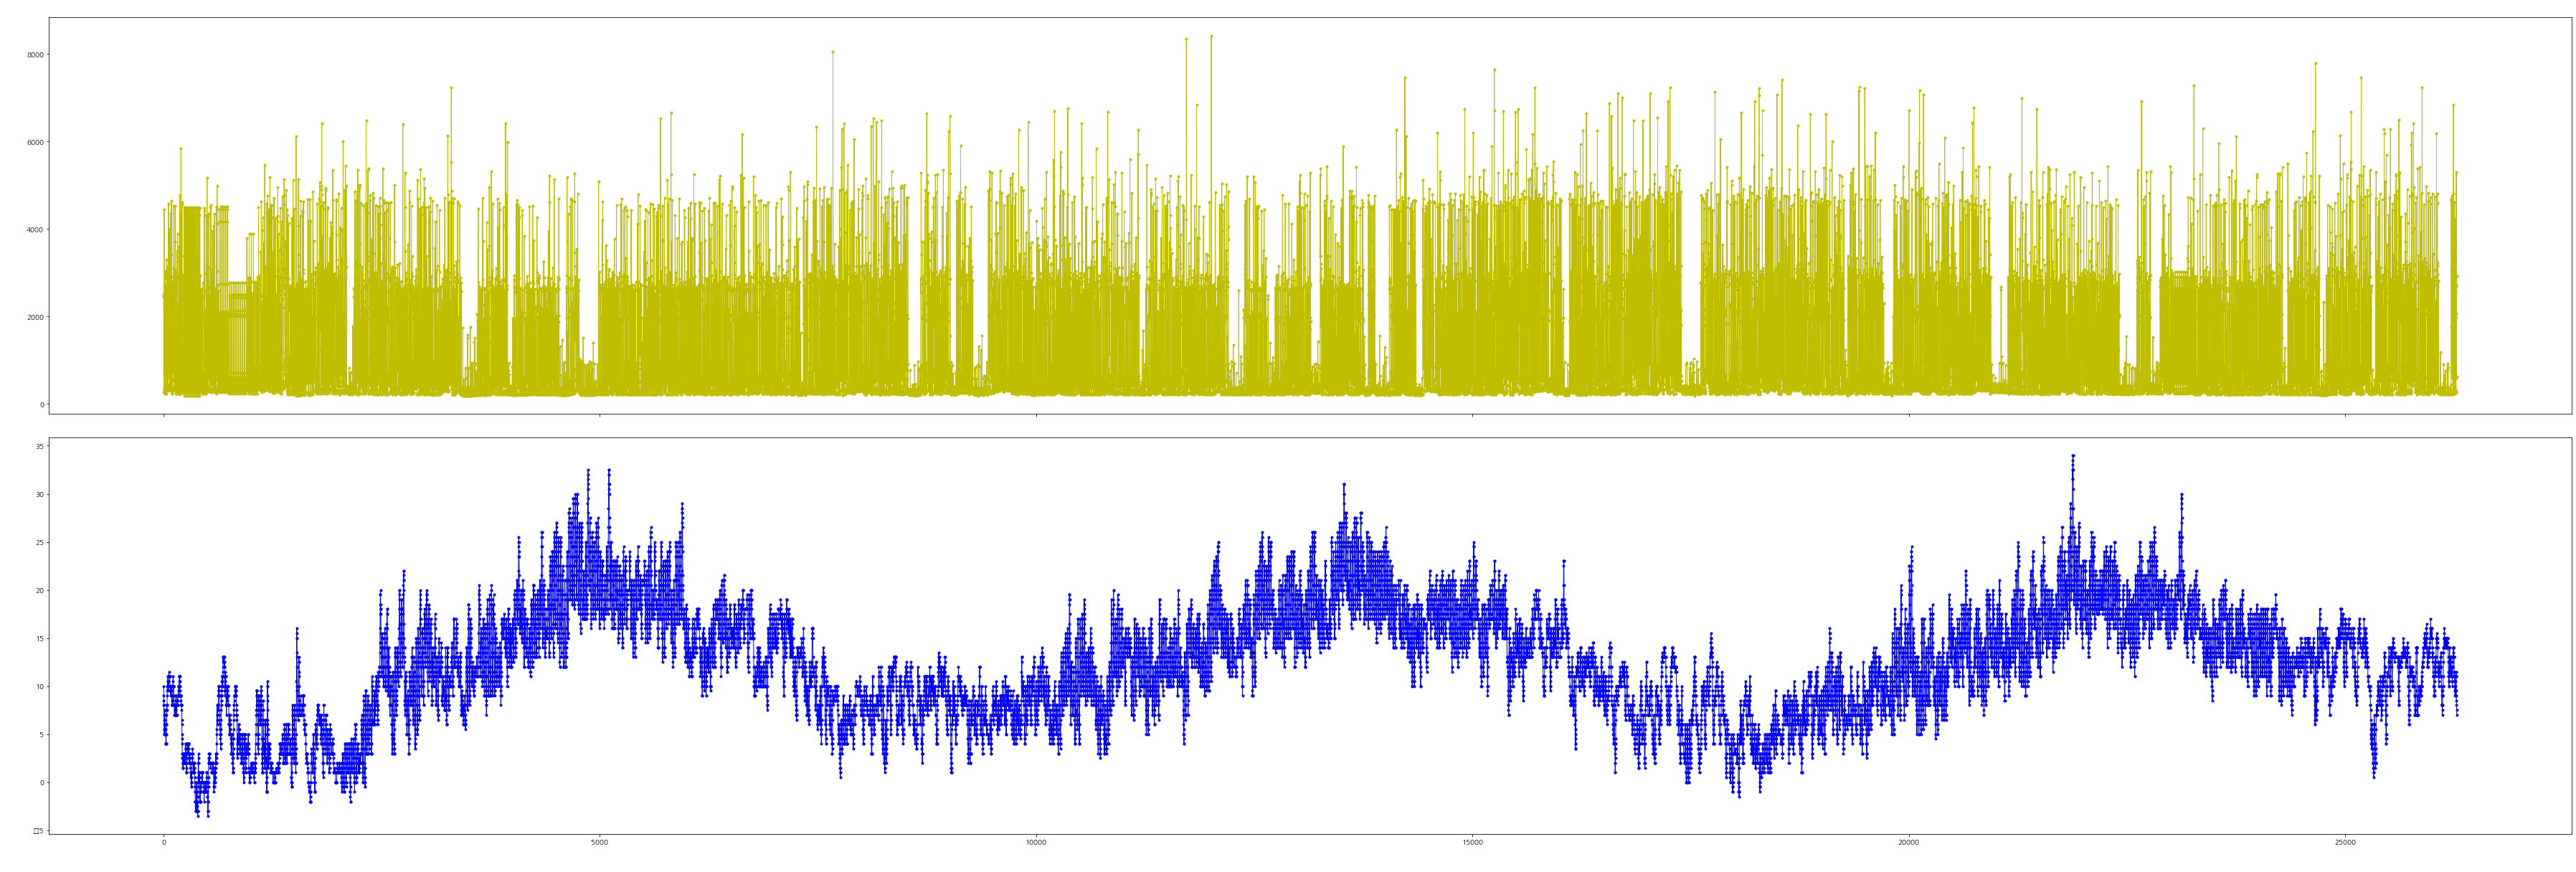

In [83]:
x = Data_3Y['Unnamed: 0']

y1 = Data_3Y['Watt']
y2 = Data_3Y['Temp']
plt.figure(figsize=(50,17))
font1 = {'color': 'w', 'weight': 'bold', 'size': 15}

ax1 = plt.subplot(2, 1, 1)
plt.plot(x, y1, '.-', color='y', linewidth=1)
plt.title("2013's Time-Watt Graph", fontdict=font1)
plt.xticks(visible=False)
plt.ylabel('Watt',labelpad=15, fontdict=font1)

ax2 = plt.subplot(2, 1, 2, sharex=ax1)
plt.plot(x, y2, '.-', color='b', linewidth=1)
plt.title("2013's Time-Temp Graph", fontdict=font1)
plt.xlabel('Time',labelpad=15, fontdict=font1)
plt.ylabel('Temp',labelpad=15, fontdict=font1)

plt.tight_layout()
plt.show()

### 데이터 정규화

In [87]:
from sklearn.preprocessing import MinMaxScaler

Data_3Y.sort_index(ascending=False).reset_index(drop=True)

scaler = MinMaxScaler()
scale_cols = ['DateTime', 'Day', 'Holiday', 'Seq', 'Watt', 'Temp']
Data_3Y_scaled = scaler.fit_transform(Data_3Y[scale_cols])
Data_3Y_scaled = pd.DataFrame(Data_3Y_scaled)
Data_3Y_scaled.columns = scale_cols

Data_3Y_scaled

ValueError: could not convert string to float: '2013년 1월 1일 - 0시'